<a href="https://colab.research.google.com/github/Asadxio/Bharat-Intern-Projects/blob/main/Bharta_intern_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task: Create a handwritten digit recognition system using a Convolutional Neural Network (CNN) on the MNIST dataset.**

**ImportLibraries**

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

**Load and Preprocess Data**

In [10]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:

# Preprocess data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [12]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Build the Neural Network Model**

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

**Compile the Model**

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


**Train the Model**

In [15]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 45s 59ms/step - loss: 0.2113 - accuracy: 0.9346 - val_loss: 0.0738 - val_accuracy: 0.9780
Epoch 2/5
750/750 [==============================] - 57s 76ms/step - loss: 0.0582 - accuracy: 0.9821 - val_loss: 0.0539 - val_accuracy: 0.9842
Epoch 3/5
750/750 [==============================] - 43s 57ms/step - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.0501 - val_accuracy: 0.9852
Epoch 4/5
750/750 [==============================] - 45s 60ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0333 - val_accuracy: 0.9901
Epoch 5/5
750/750 [==============================] - 43s 57ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0384 - val_accuracy: 0.9887


**Evaluate the Model**

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


313/313 [==============================] - 3s 9ms/step - loss: 0.0344 - accuracy: 0.9888
Test accuracy: 0.9887999892234802


**Visualize Training History**

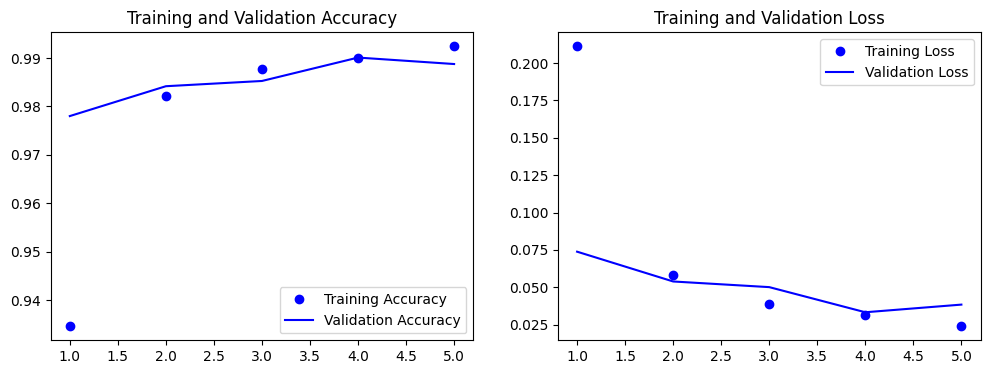

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


**Test accuracy: 0.9887999892234802**